# LIBRARIES IMPORT

In [ ]:
from fig_lib import *
from CNN_lib import *

In [13]:
# imports

import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# DATA GENERATOR

In [2]:
# -------- DATA PARAMS --------

n_recs_train,n_recs_eval=5000,500
height, width = 100, 100
circles_filled=False


# -------- CNN PARAMS --------

epch=5


In [3]:
#input_d, eval_d

input_d=im_data_gen(height, width,n_recs_train,'I',cir_f=circles_filled,color=255)
eval_d=im_data_gen(height, width,n_recs_eval,'I',cir_f=circles_filled,color=255)

In [4]:
print('RECORD - LABEL - SHAPE')
for R in input_d.keys():
    print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))

RECORD - LABEL - SHAPE
I0 circle (100, 100) <class 'numpy.ndarray'>
I1 circle (100, 100) <class 'numpy.ndarray'>
I2 circle (100, 100) <class 'numpy.ndarray'>
I3 circle (100, 100) <class 'numpy.ndarray'>
I4 circle (100, 100) <class 'numpy.ndarray'>
I5 line (100, 100) <class 'numpy.ndarray'>
I6 line (100, 100) <class 'numpy.ndarray'>
I7 line (100, 100) <class 'numpy.ndarray'>
I8 circle (100, 100) <class 'numpy.ndarray'>
I9 line (100, 100) <class 'numpy.ndarray'>
I10 circle (100, 100) <class 'numpy.ndarray'>
I11 circle (100, 100) <class 'numpy.ndarray'>
I12 circle (100, 100) <class 'numpy.ndarray'>
I13 circle (100, 100) <class 'numpy.ndarray'>
I14 circle (100, 100) <class 'numpy.ndarray'>
I15 circle (100, 100) <class 'numpy.ndarray'>
I16 line (100, 100) <class 'numpy.ndarray'>
I17 line (100, 100) <class 'numpy.ndarray'>
I18 line (100, 100) <class 'numpy.ndarray'>
I19 circle (100, 100) <class 'numpy.ndarray'>
I20 circle (100, 100) <class 'numpy.ndarray'>
I21 circle (100, 100) <class 'numpy

circle


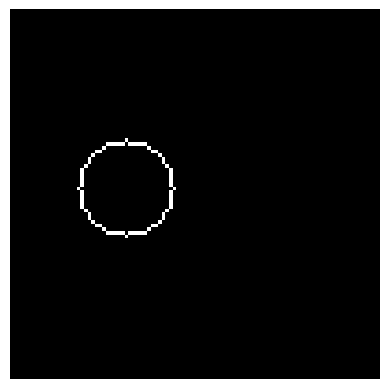

In [5]:
d_plt_check,rec_check=True,'I1'
print(input_d[rec_check]['label'])

if d_plt_check:

    imagen = input_d[rec_check]['image']

    plt.imshow(imagen, cmap='gray')
    plt.axis('off')
    plt.show()


# CNN

### GENERATE TRAIN DATA

In [9]:
# X_train,Y_train,X_eval,Y_eval

X_train,Y_train =cnn_data_bin_gen(input_d,zero='circle', one= 'line')
X_eval,Y_eval = cnn_data_bin_gen(eval_d,zero='circle', one= 'line')

print('Train data:',len(Y_train),'Evaluation data:',len(Y_eval))

Train data: 5000 Evaluation data: 500


 Train data shape: (5000, 100, 100)


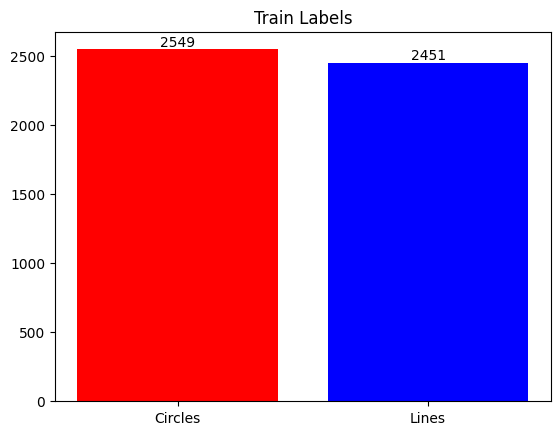

In [11]:
# check data

zeros_count = np.sum(Y_train == 0)
ones_count = np.sum(Y_train == 1)

labels = ['Circles', 'Lines']
print(' Train data shape:', np.shape(X_train))

plt.bar(labels, [zeros_count, ones_count], color=['red', 'blue'])

for i, count in enumerate([zeros_count, ones_count]):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Train Labels')
plt.show()

### GENERATE MODEL

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(height, width)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

NameError: name 'tf' is not defined

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=epch)

In [ ]:
loss, accuracy = model.evaluate(X_eval,Y_eval,verbose=2)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

### FORECAST

GENERATE RANDOM IMAGE

In [ ]:

rnd_n=np.random.random()

if rnd_n<0.5:

    x1=np.random.randint(0, width-1)
    x2=np.random.randint(0, width-1)
    y1=np.random.randint(0, height-1)
    y2=np.random.randint(0, height-1)
    thickness=np.random.randint(1, 3)

    image = np.zeros((height, width), dtype=np.uint8)
    cv2.line(image, (x1, y1), (x2, y2), color=255, thickness=thickness)

else:
    if circles_filled:thickness=cv2.FILLED
    else:thickness=np.random.randint(1, 2)
    
    x= np.random.randint(int(0+width*0.3), int(width - width*0.3))
    y=np.random.randint(int(0+height*0.3), int(height-height*0.3))
    radio = np.random.randint(12, 17)
    
    image = np.zeros((height, width), dtype=np.uint8)
    
    cv2.circle(image, (x,y), radio, color=255, thickness=thickness)



In [ ]:


pred = model.predict(np.expand_dims(image, axis=0),verbose=2)

pred_r=np.round(pred[0][0], decimals=4)

print('FORECAST:')
if pred_r >=0.5: print(f'{pred_r*100} % Line')
else:print(f'{(1-pred_r)*100} % Circle')
print(' ')

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

